In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts

In [2]:
fileId = '0009'

In [3]:
filepath = r'D:\Data\cs-8395-dl\assignment3\Training\img\img{}.nii.gz'.format(
    fileId)

In [4]:
img_nib = nib.load(filepath)

In [5]:
img_np =img_nib.get_fdata()

In [6]:
img_np.shape

(512, 512, 149)

In [7]:
img_np.size

39059456

In [8]:
img_np.dtype

dtype('float64')

In [9]:
img_np.max(), img_np.min(), img_np.mean(), np.median(img_np)

(3071.0, -3024.0, -1016.3075838537025, -891.0)

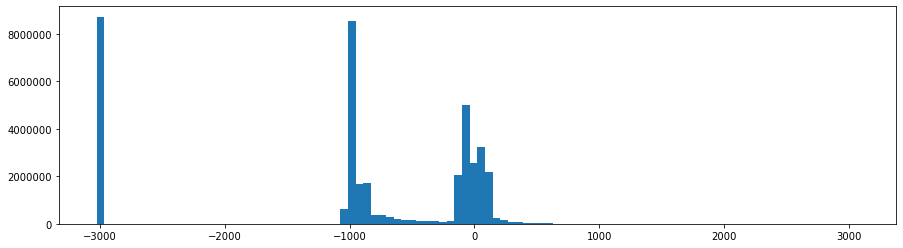

In [10]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [11]:
img_np[img_np>300]=-100
img_np[img_np<-100]=-100

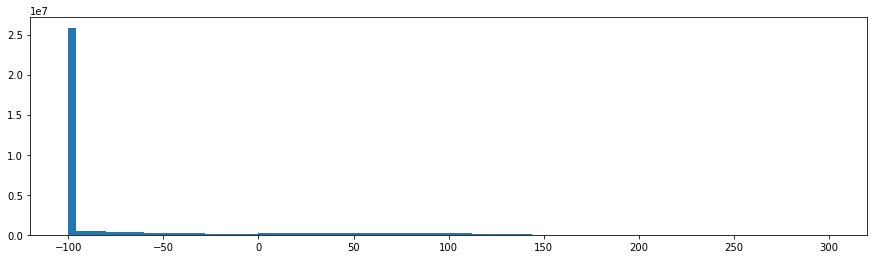

In [12]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [13]:
img_np_norm = (img_np-img_np.min())/(img_np.max()-img_np.min())

In [14]:
img_np_norm.max(), img_np_norm.min(), img_np_norm.mean(), np.median(img_np_norm)

(1.0, 0.0, 0.09390911755145788, 0.0)

In [15]:
img_np_norm_tr=img_np_norm.transpose((2,0,1))

In [16]:
filepath_label = r'D:\Data\cs-8395-dl\assignment3\Training\label\label{}.nii.gz'.format(fileId)
label_nib = nib.load(filepath_label)

In [17]:
label_np = label_nib.get_fdata()

In [18]:
label_np.shape

(512, 512, 149)

In [19]:
label_np.max(), label_np.min(), np.unique(label_np.ravel())

(13.0,
 0.0,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]))

In [20]:
label_np_tr = label_np.transpose((2,0,1))
label_np_tr.shape

(149, 512, 512)

0


d:\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


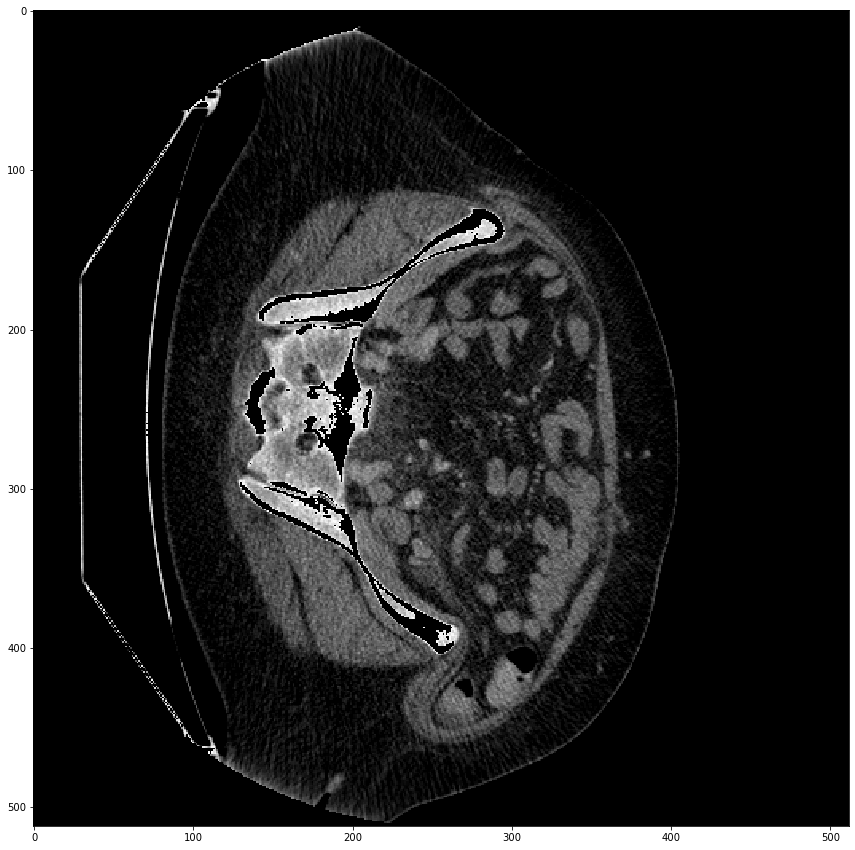

10


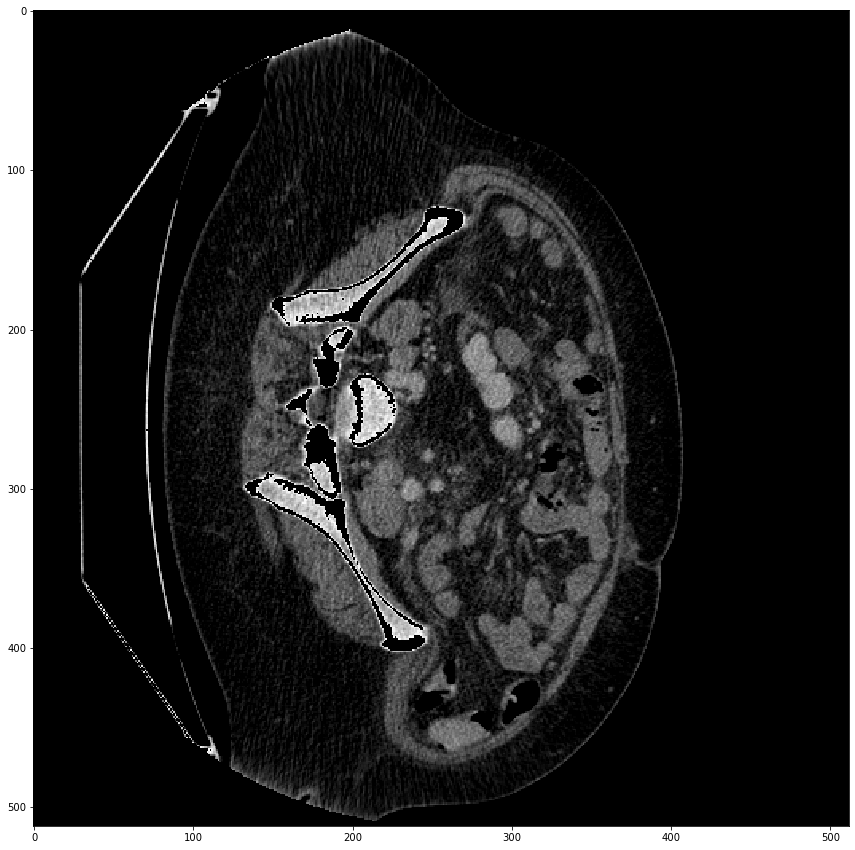

20


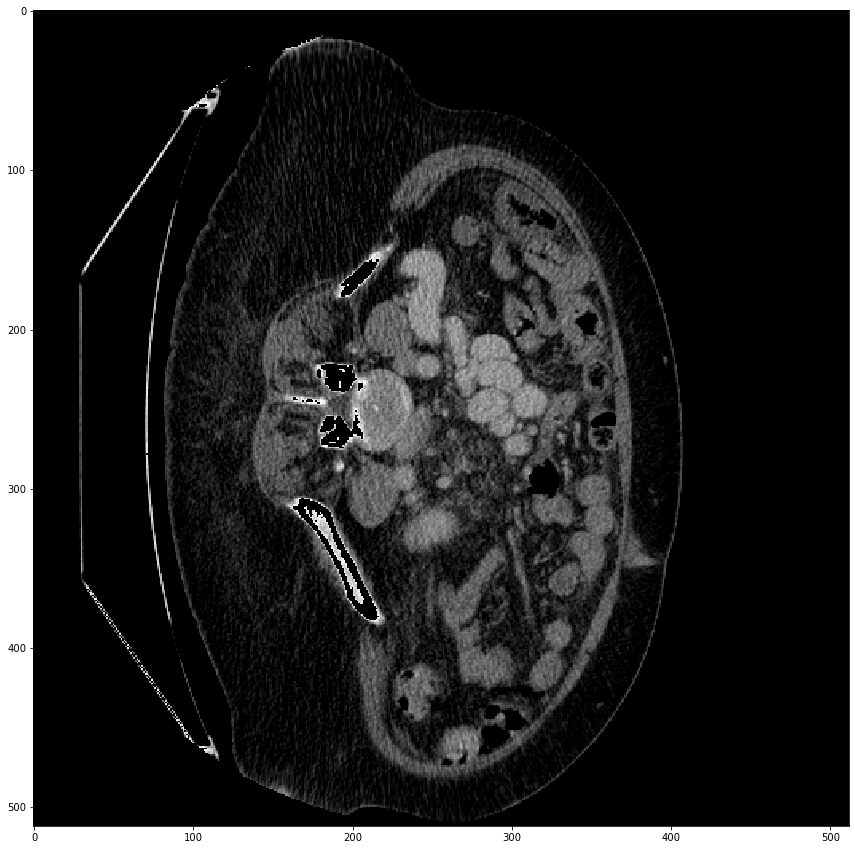

30


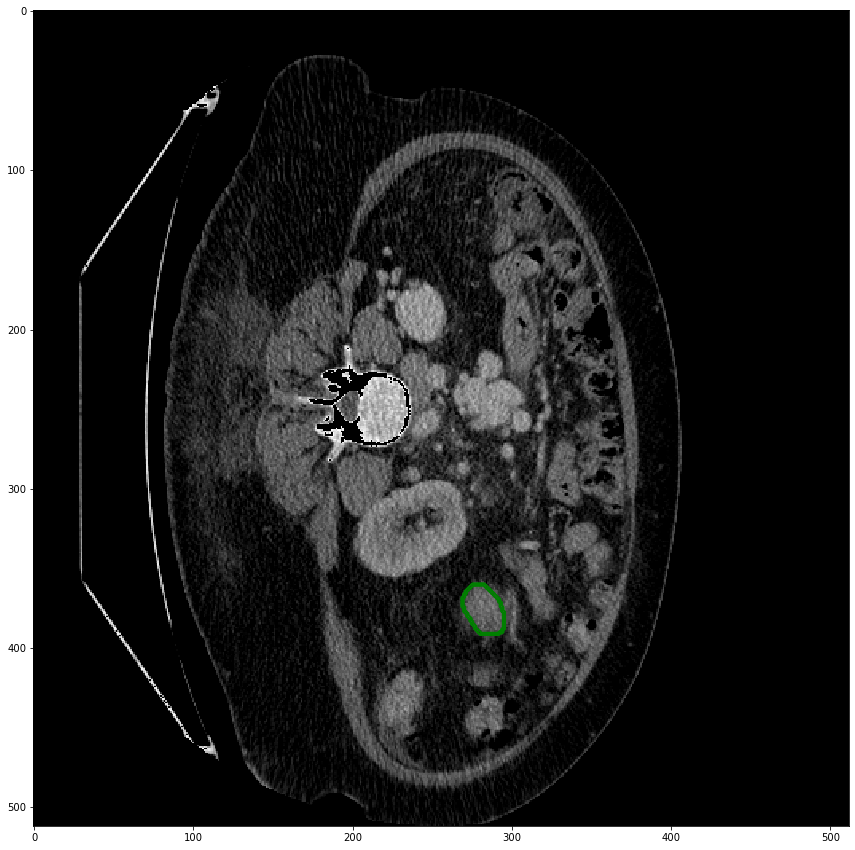

40


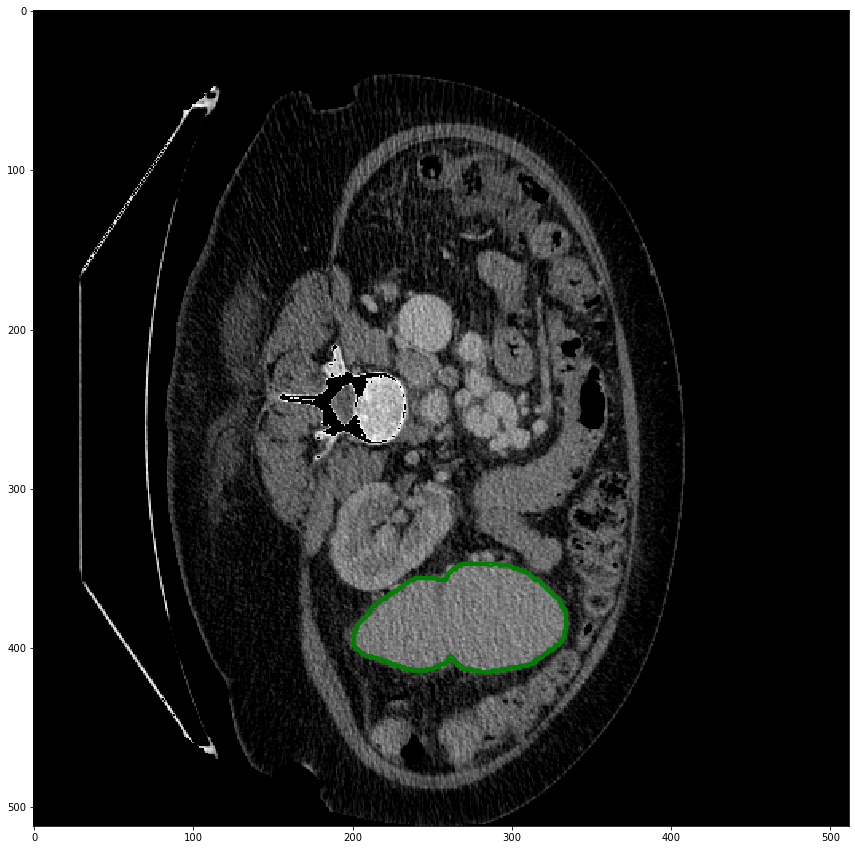

50


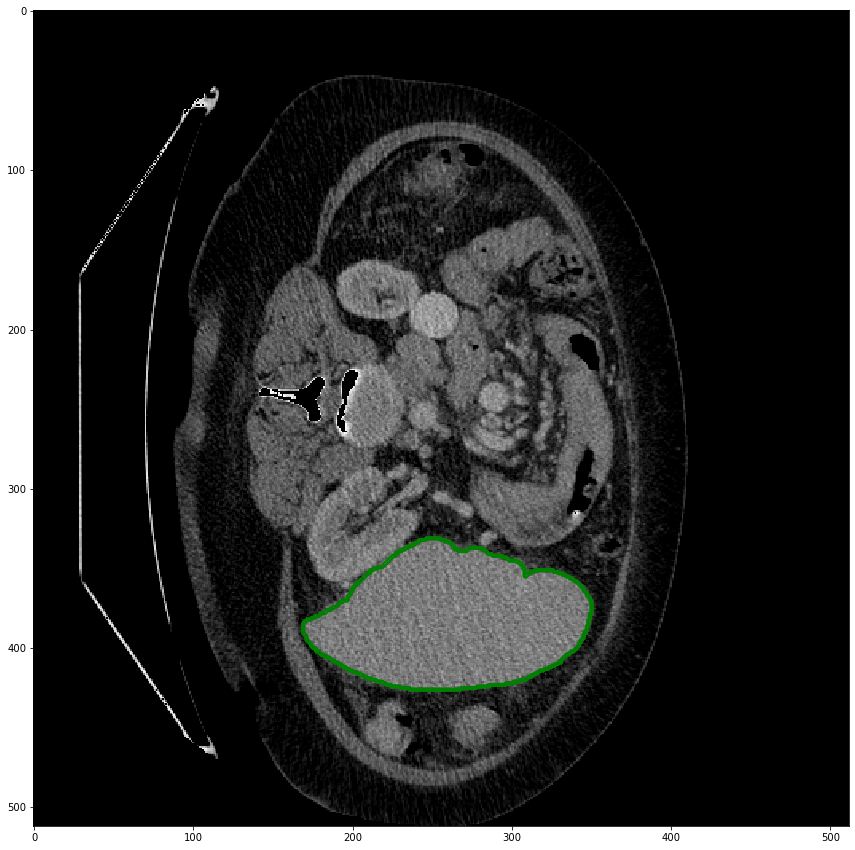

60


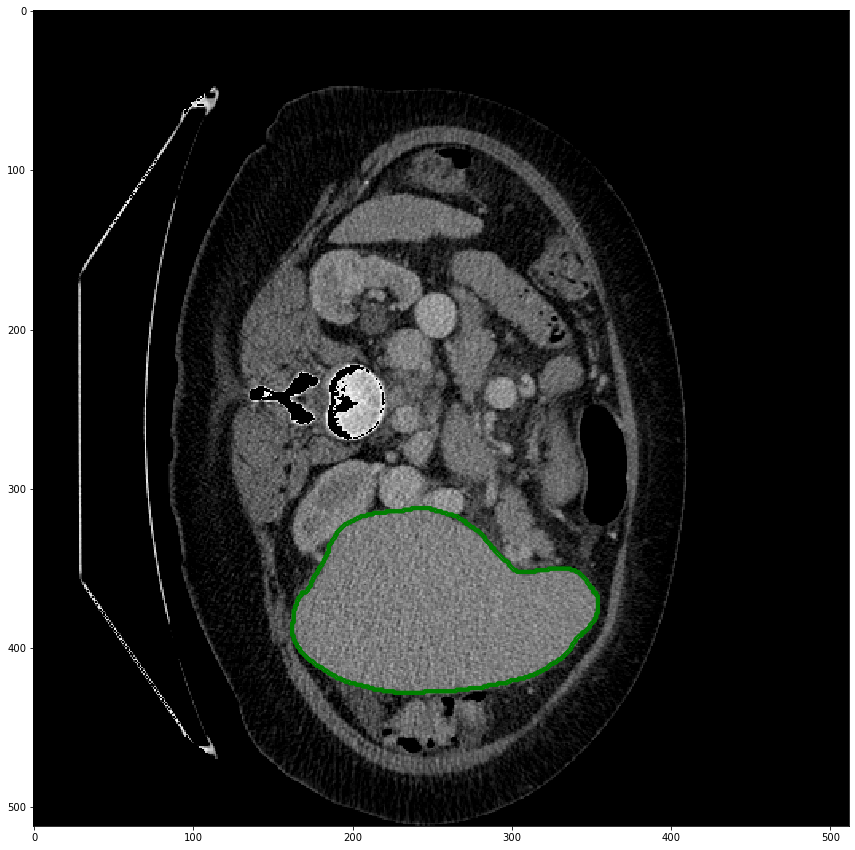

70


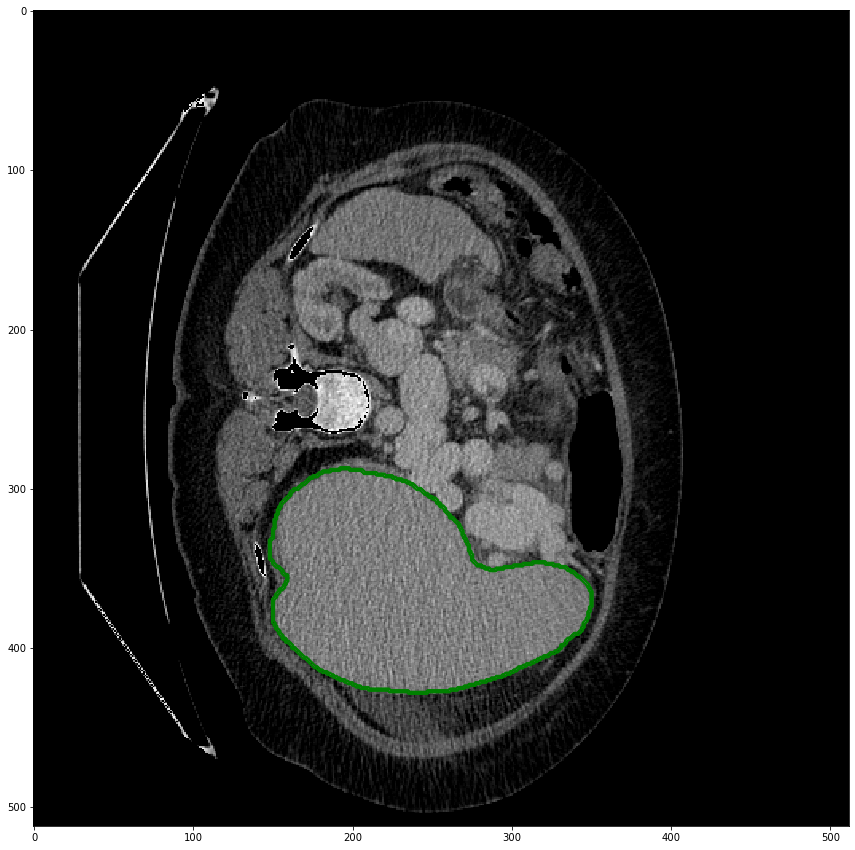

80


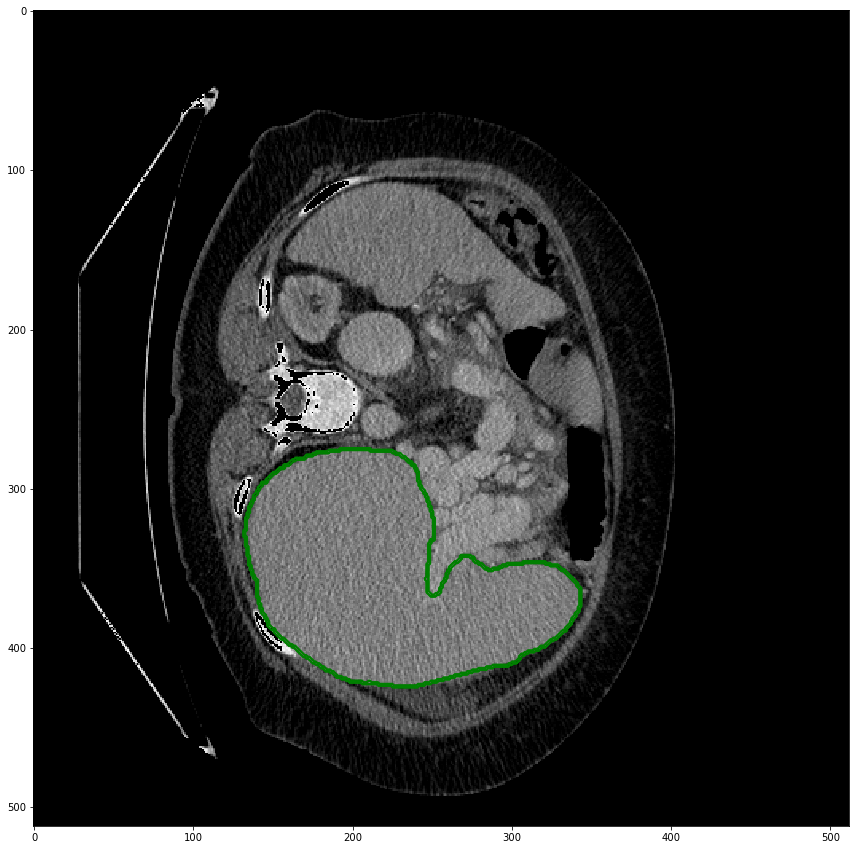

90


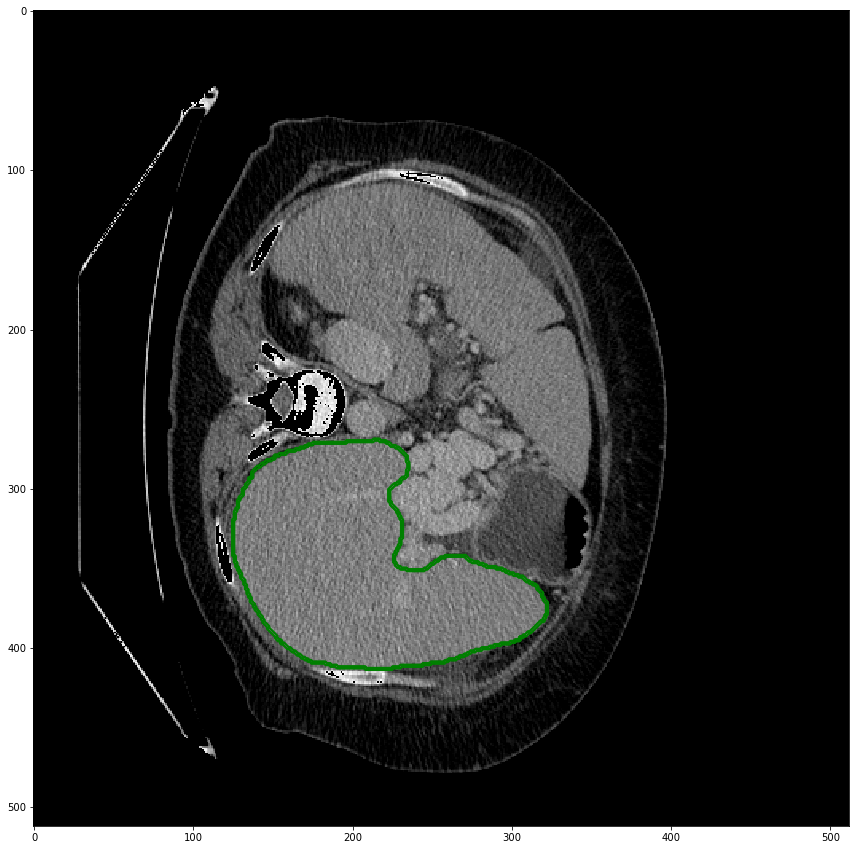

100


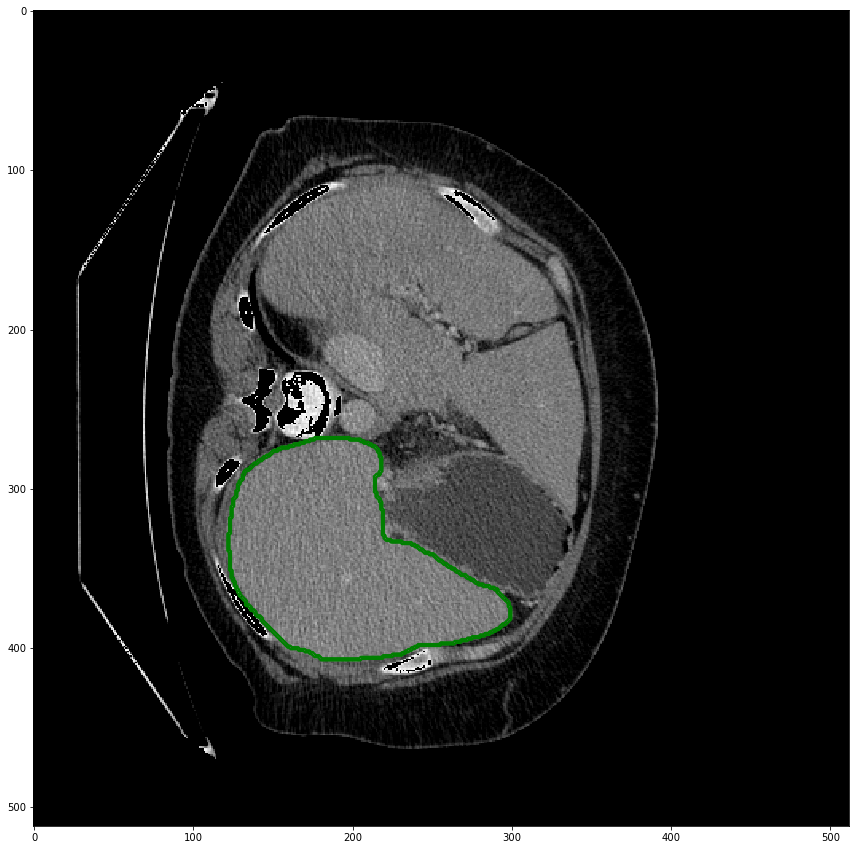

110


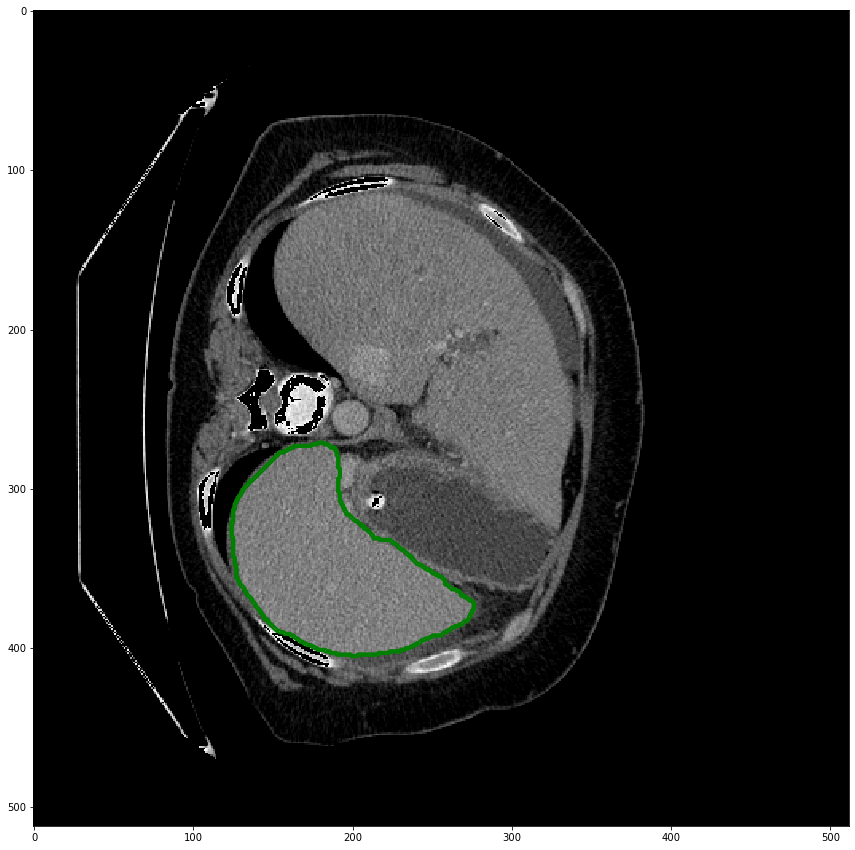

120


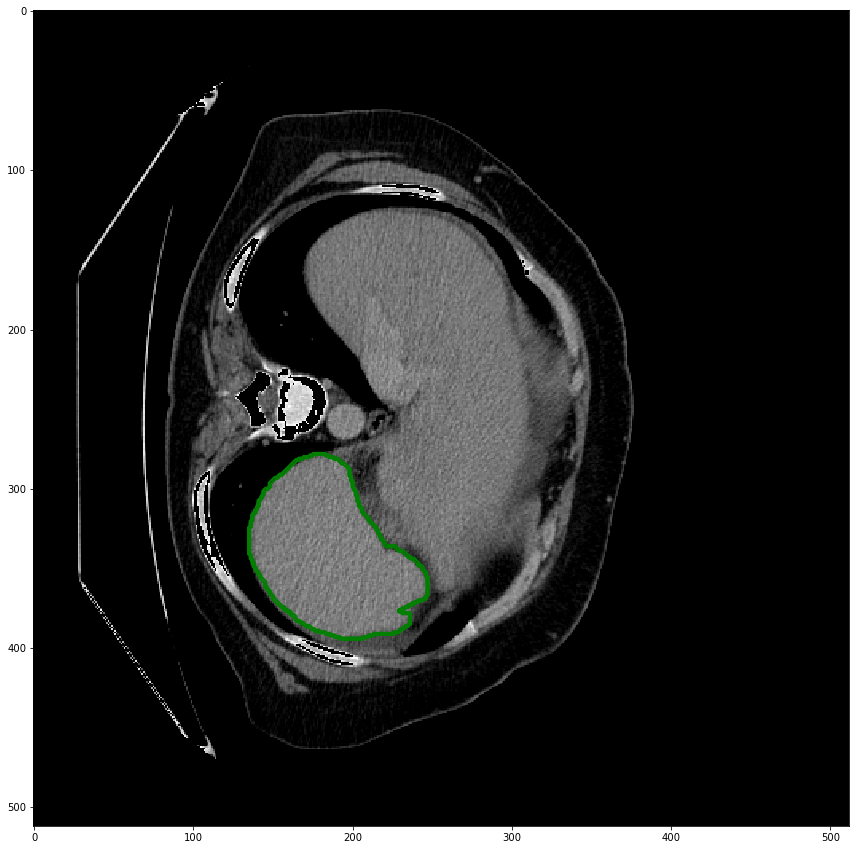

130


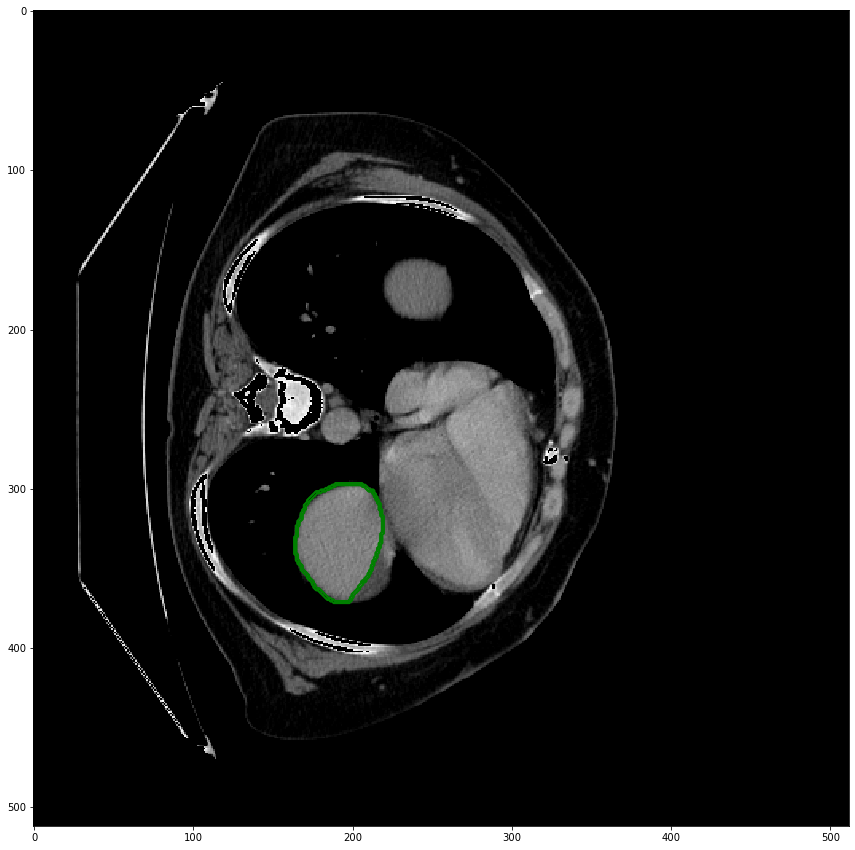

140


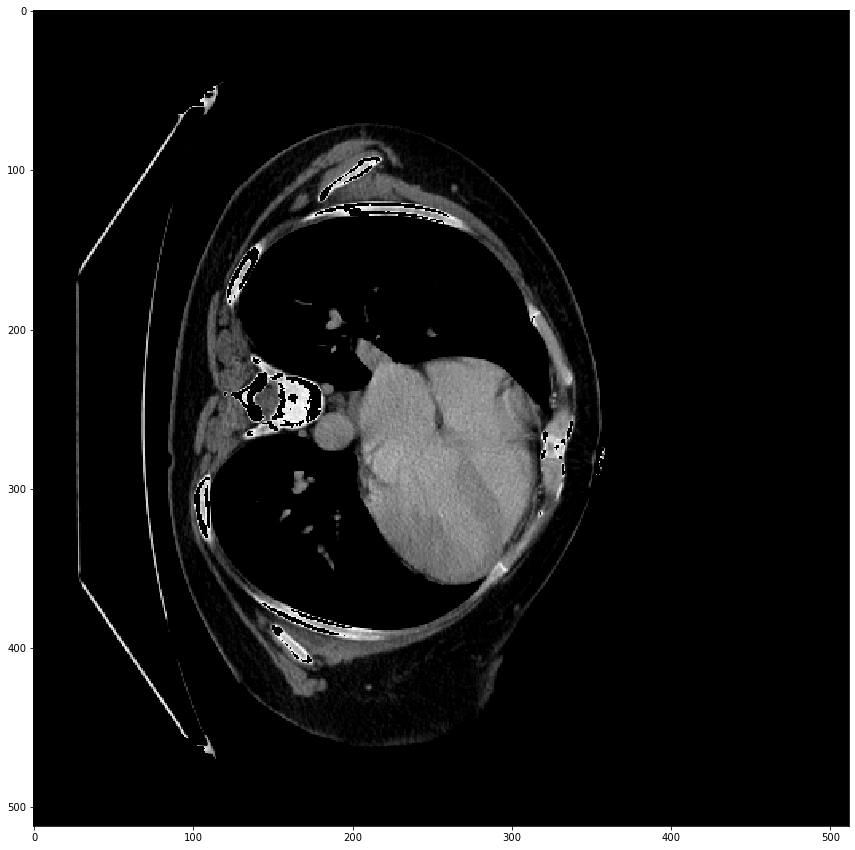

In [21]:
for ind in range(0,149,10):
    print(ind)
    plt.figure(figsize=(15,15))
    plt.imshow(img_np_norm_tr[ind],cmap='gray')
    label_np_tr_sp = label_np_tr[ind].copy()
    label_np_tr_sp[label_np_tr_sp!=1]=0
    label_np_tr_sp_ol = (roberts(label_np_tr_sp > label_np_tr_sp.max() / 2) * 255).astype(np.uint8)
    plt.contour(label_np_tr_sp_ol, colors='green', linewidths=1)
    plt.show()